<a href="https://colab.research.google.com/github/VOL-EM2024/mo/blob/main/Laba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.metrics as metrics
from statsmodels.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## **Сожердание:**



price_range: Это целевая переменbattery_power: Общая энергия, которую батарея может накопить за один раз (мАч)

blue: Есть Bluetooth или нет

clock_speed: скорость, с которой микропроцессор выполняет инструкции

dual_sim: Поддерживает две sim-карты или нет

fc: Мегапиксельная фронтальная камера

four_g: Есть 4G или нет

int_memory: Внутренняя память (ГБ)

m_dep: Глубина мобильного устройства (см)

mobile_wt: Вес мобильного телефона

n_cores: Количество ядер процессора

пк: Основная камера (Мп)

px_height: Высота разрешения (п)

px_width: Ширина разрешения (п)

ram: Оперативная память с произвольным доступом (МБ)

sc_h: Высота экрана мобильного устройства (см)

sc_w: Ширина экрана мобильного устройства (см)

talk_time: максимальное время, в течение которого будет длиться один заряд батареи, когда вы находитесь

three_g: Есть 3G или нет

touch_screen: Есть сенсорный экран или нет

wi-Fi: Есть Wi-Fi или нетная со значением 0 (низкая стоимость), 1 (средняя стоимость), 2 (высокая стоимость) и 3 (очень высокая стоимость).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.shape # количество строк и столбцов

(2000, 21)

In [ ]:
df.isnull().sum() # количество пропусков

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, 'Correlation ')

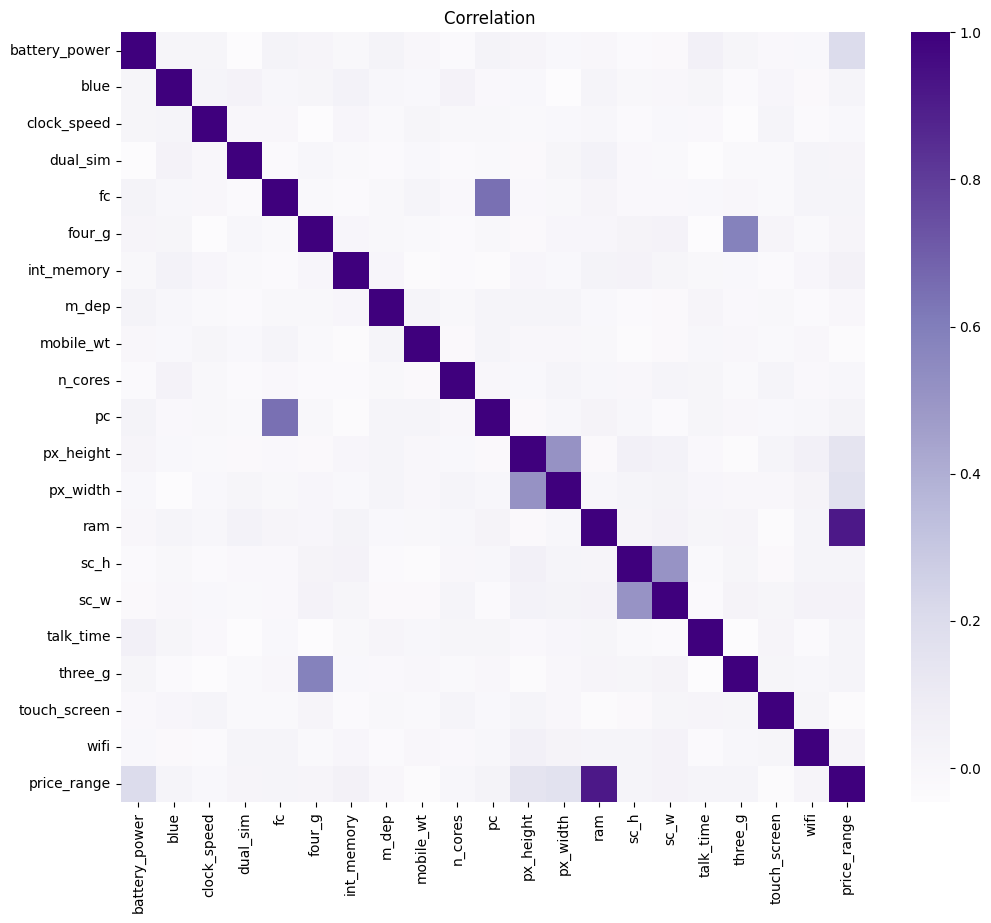

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
fig = plt.figure(figsize=(12,10))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

По нашей матрице можно заметить,что целевая переменная (price_range) имеет обольшую корреляцию с оперативной памятью(ram).


In [ ]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

Тут мы видем как именно они коррелируют между собой, близко к 1, 0.917

<Axes: xlabel='price_range', ylabel='ram'>

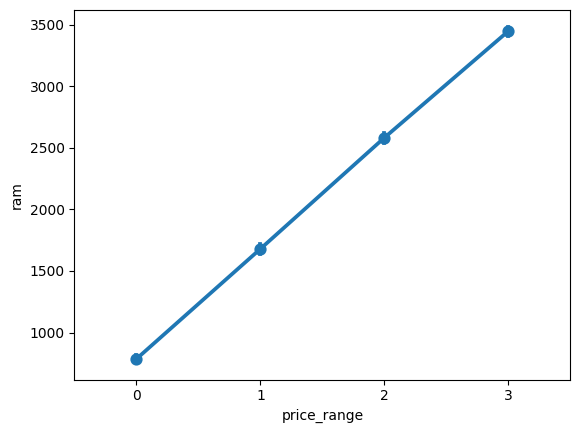

In [ ]:
sns.pointplot(y='ram',x='price_range',data=df)

<Axes: xlabel='price_range', ylabel='battery_power'>

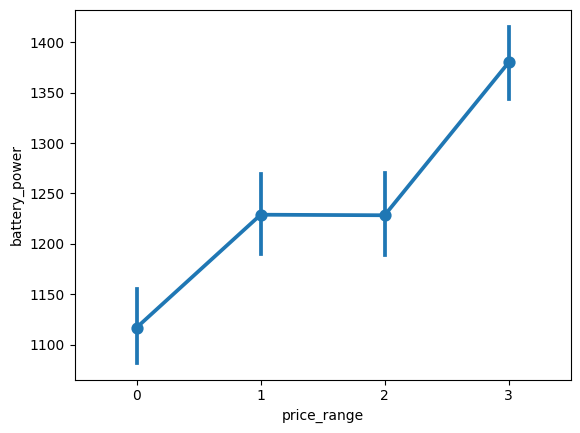

In [ ]:
sns.pointplot(x='price_range',y='battery_power',data=df)

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [ ]:
y.unique() # неповторяющиеся значения

array([1, 2, 3, 0])

In [ ]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
scale = StandardScaler()
scaled = scale.fit_transform(X)

построить минимум 3 модели, используя 3 разных алгоритма

Первая модель

In [ ]:
lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(X_train,y_train)

#y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

#lr_acc=accuracy_score(y_test_pred,y_test)

print("Точность: "+str(accuracy_score(y_train_pred,y_train)*100))
#print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test)) # Модель логистической регрессии

Точность: 64.3125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Вторая модель

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)

#y_test_pred1 = knn.predict(X_test)
y_train_pred1 = knn.predict(X_train)

#knn_acc=accuracy_score(y_test_pred1,y_test)

print("Точность: "+str(accuracy_score(y_train_pred1,y_train)*100)) # K-Средних

Точность: 95.0


Третья модель

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_test_pred2 = svc.predict(X_test)
y_train_pred2 = svc.predict(X_train)

print("Точность: "+str(accuracy_score(y_train_pred2,y_train)*100)) # SVC

Точность: 95.3125


Можно увидеть, что у 3 модели точность выше


для лучшей модели отобразить матрицу путаницы и отчет о классификации для тестовой выборки

In [ ]:
cm = confusion_matrix(y_test_pred2,y_test)

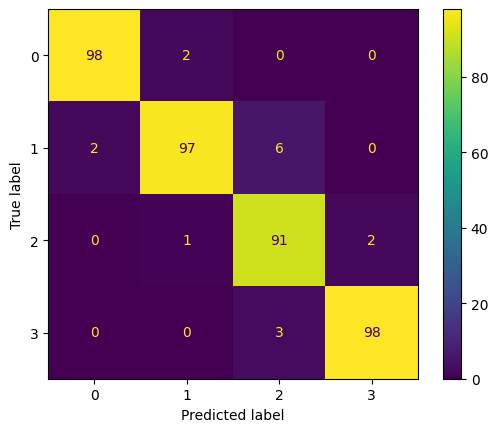

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.97      0.92      0.95       105
           2       0.91      0.97      0.94        94
           3       0.98      0.97      0.98       101

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
# точность для тестовой выборки

print("Точность: "+str(accuracy_score(y_test_pred2,y_test)*100))

Точность: 96.0


Что можно сказать, все супер пупер

построить дерево решений и визуализировать его

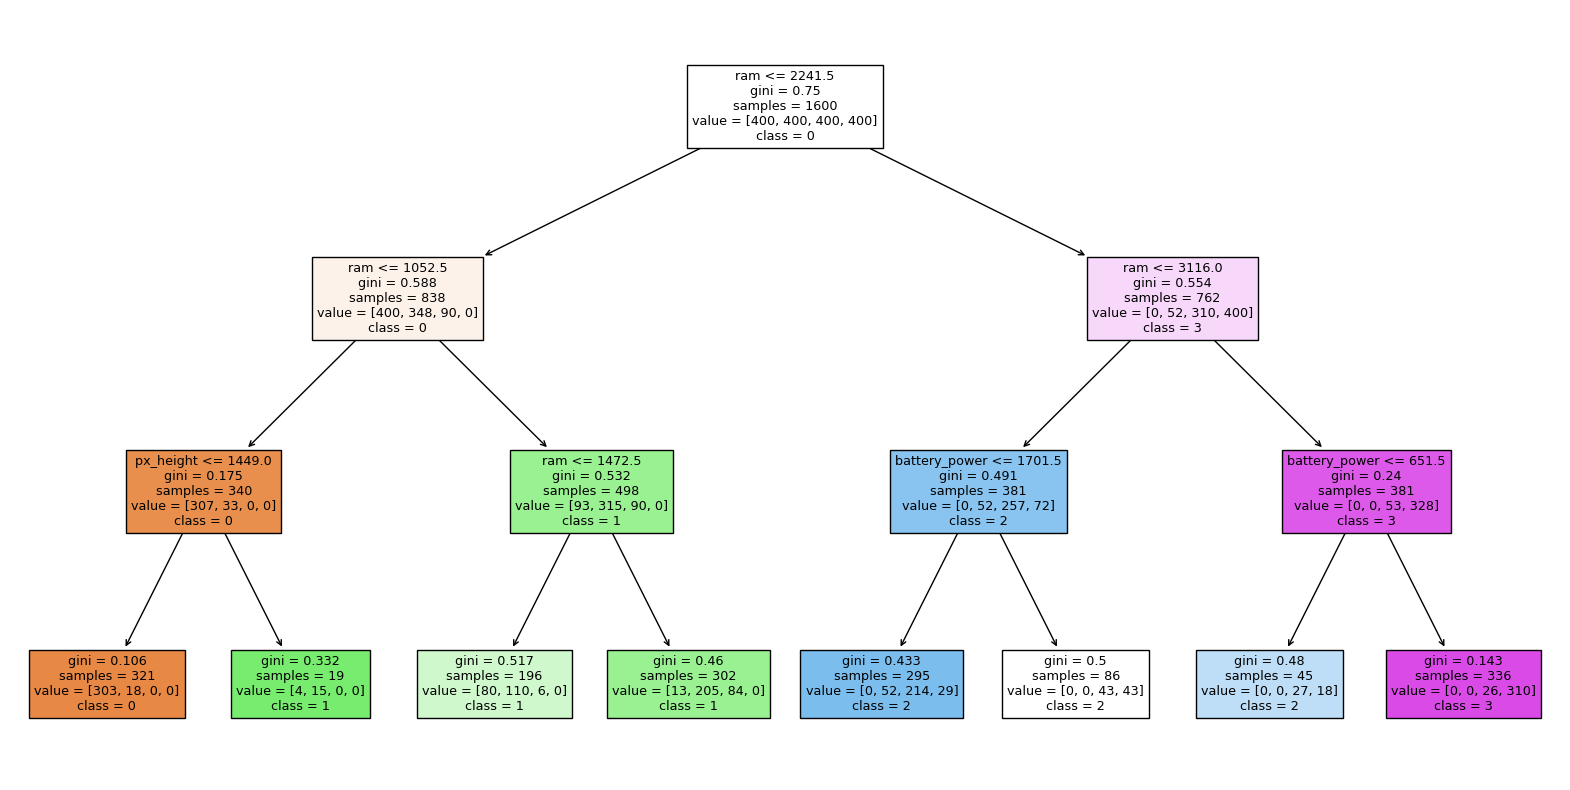

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3'])
plt.show()